In [3]:
import glob
import pandas as pd
import re
import pickle
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

/home/garg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [20]:
with open("manifold.json") as f:
    obj = json.load(f)

manifold_df = pd.DataFrame(obj)
manifold_df['t'] = pd.to_datetime(manifold_df['createdTime'] * 1e6)
manifold_df['p'] = manifold_df['probBefore']

In [22]:
with open("polymarket.json") as f:
    obj = json.load(f)

polymarket_df = pd.DataFrame(obj)
polymarket_df['t'] = pd.to_datetime(polymarket_df['t'] * 1e9)

In [26]:
lead_df = manifold_df[(manifold_df['t'] > '2024-06-15') & (manifold_df['t'] < '2024-07-04')].copy()
lag_df  = polymarket_df[(polymarket_df['t'] > '2024-06-15') & (polymarket_df['t'] < '2024-07-04')].copy()

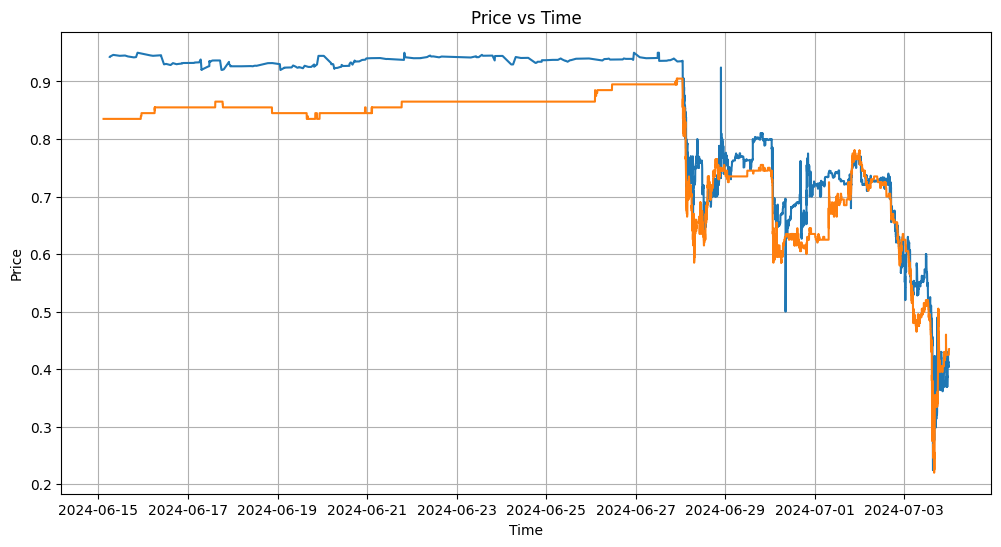

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(lead_df['t'], lead_df['p'])
plt.plot(lag_df['t'], lag_df['p'])
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

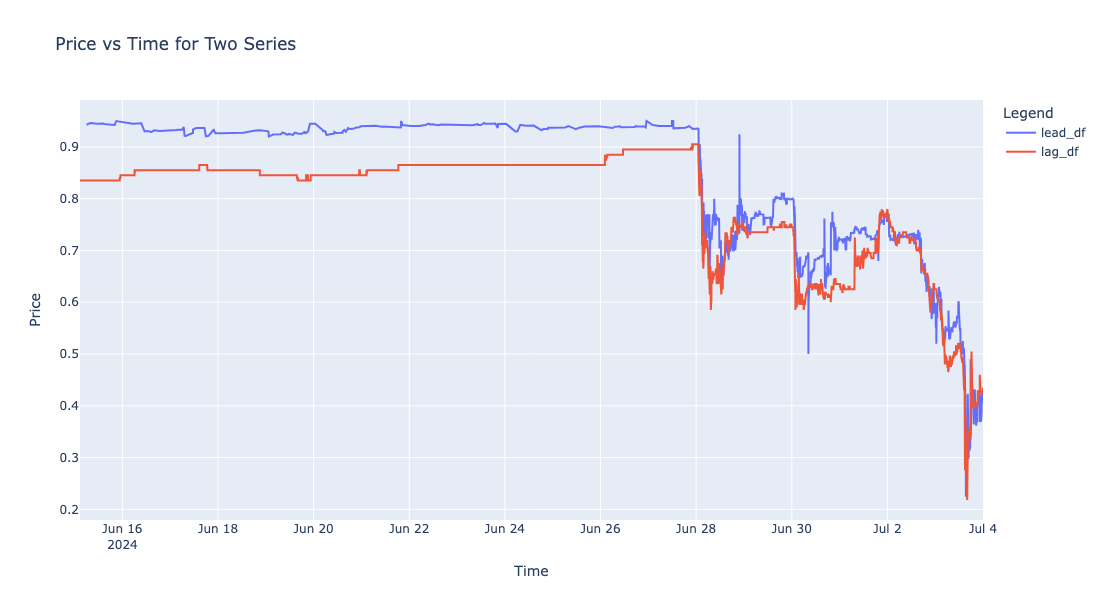

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=lead_df['t'], y=lead_df['p'], mode='lines', name='lead_df'))

# Add trace for the second DataFrame
fig.add_trace(go.Scatter(x=lag_df['t'], y=lag_df['p'], mode='lines', name='lag_df'))

# Update layout
fig.update_layout(
    title='Price vs Time for Two Series',
    xaxis_title='Time',
    yaxis_title='Price',
    legend_title='Legend',
    hovermode='x unified',
    height=600,  # Set the height to 800 pixels
    # width=1000   # Set the width to 1000 pixels
)

# pio.show(fig)
fig.show()
# fig.write_html("interactive_plot.html")